In [1]:
# Import of the classic dictionaries environment in Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import the function to separate our dataset into training and test sets
from sklearn.model_selection import train_test_split

# Import of the function to implement a linear regression

from sklearn.linear_model import LinearRegression

# Import the fonction permettant oe model regression dictionaries

from sklearn.ensemble import RandomForestRegressor

# Import metrics to quantify the performance of our regression model

from sklearn.metrics import mean_squared_error, r2_score

# Command to display charts directly in this notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#  Import Housing Data Set

df = pd.read_csv('housing.csv')

df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
df.shape

(20640, 10)

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


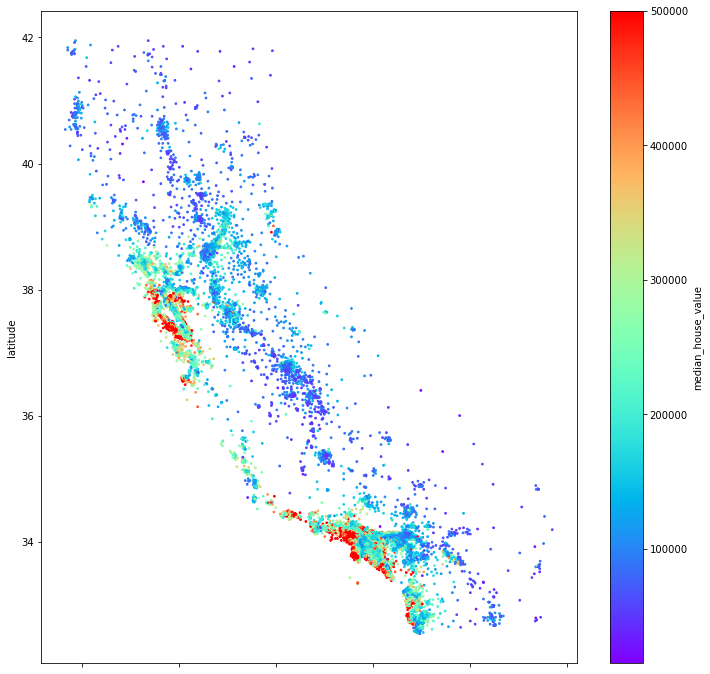

In [38]:
# Display of districts in California according to their geographic coordinates, colored by price
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', c = 'median_house_value', cmap = 'rainbow', s = 3,figsize = (12, 12))
plt.show()

In [42]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


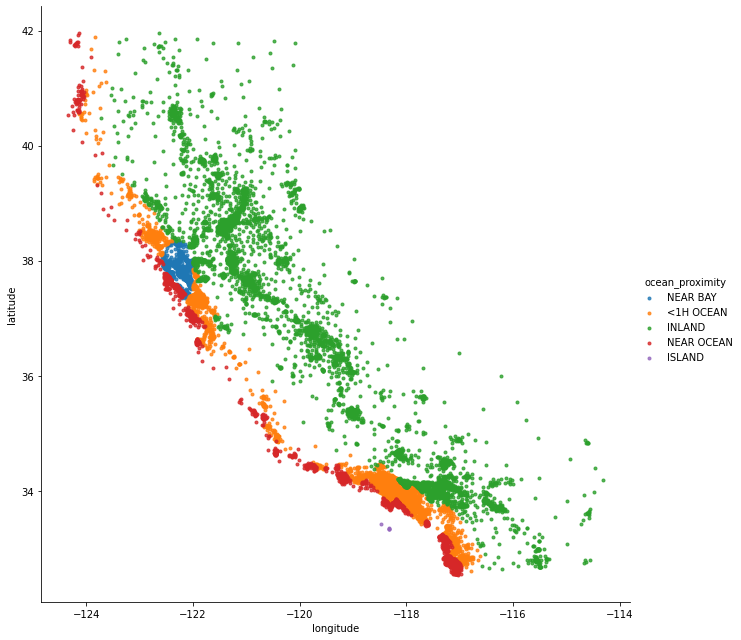

In [43]:
# Display of districts in California according to their geographic coordinates, colored by proximity to the ocean

sns.lmplot(x = 'longitude', y = 'latitude', data = df, markers = '.', hue = 'ocean_proximity', fit_reg = False, height = 9)
plt.show()

In [12]:
#  Display of the modalities of the variable 'ocean_proximity

df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

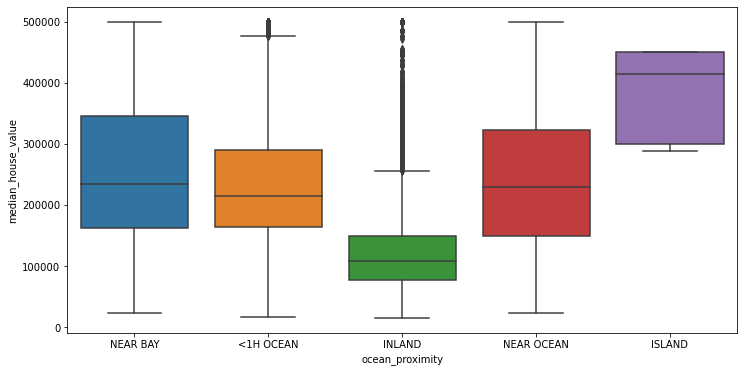

In [13]:
#  Showing box plots based on the modalities of the 'ocean_proximity' variable
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'ocean_proximity', y = 'median_house_value', data = df)
plt.show()

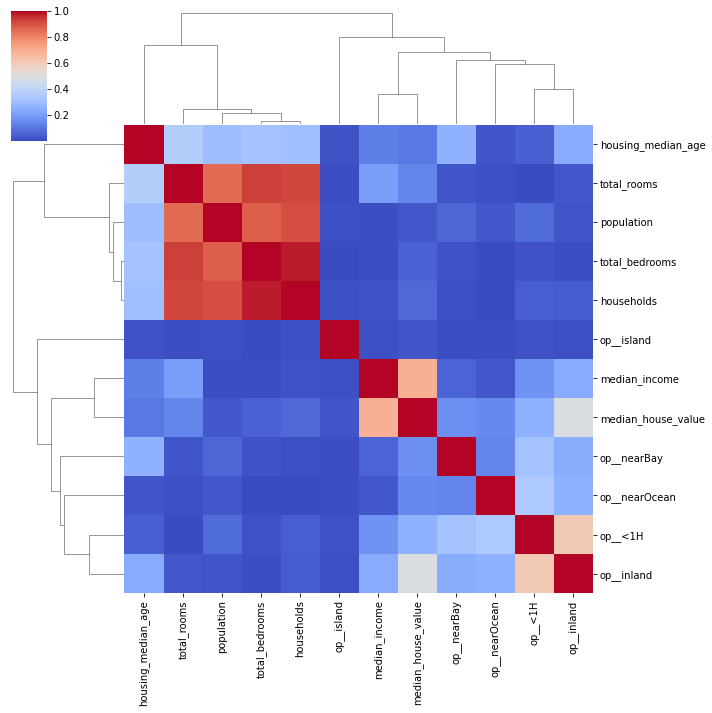

In [14]:
# Renaming Variable Modalities 'ocean proximity' in order to be able to have clean indicator names without spaces

df['ocean_proximity'] = df['ocean_proximity'].replace(to_replace = ['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
                                                      value = ['inland', '<1H', 'nearOcean', 'nearBay', 'island'])

# Transformation of the variable 'ocean_proximity' and variables indicators.
df = df.join(pd.get_dummies(df['ocean_proximity'], prefix = 'op_')).drop(['ocean_proximity'], axis = 1)

# Displaying a heatmap the corrélations between the variables of df according to the Pearson criterion, 
# grouped by clusters classified by proximity
sns.clustermap(abs(df.drop(['longitude', 'latitude'], axis = 1).corr(method = 'pearson')), cmap = "coolwarm")
plt.show()

In [15]:
# Display of Pearson correlation values ​​between the target variable 'median_house_value' and the others 

correlations_house_value = df.drop(['longitude', 'latitude'], axis = 1).corr(method = 'pearson')['median_house_value'].drop('median_house_value', axis = 0)

print(abs(correlations_house_value).sort_values(ascending = False))

median_income         0.688075
op__inland            0.484859
op__<1H               0.256617
op__nearBay           0.160284
op__nearOcean         0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population            0.024650
op__island            0.023416
Name: median_house_value, dtype: float64


In [16]:
# Machine Learning

# Target variable storage "median_house_value" in a named vector Target
target = df['median_house_value']

# Storage of variables explanatory in a DataFrame named 'explanatory_vars'
explanatory_vars = df.drop(['median_house_value'], axis = 1)

# Separation into a learning game containing 80% data and a test set with the remaining data
X_train, X_test, y_train, y_test = train_test_split(explanatory_vars, target, test_size = 0.2, random_state = 42)

In [45]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [46]:
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [47]:
# to check if the value is null/NaN. It will return True if the value is NaN/null.

df = float("nan")
print(f"It's pd.isna  : {pd.isna(df)}")

It's pd.isna  : True


In [59]:
# Attempting to remove NaN ErrorValue
# df[df==np.inf]=np.nan
# df.fillna(df.mean(), inplace=True)

In [62]:
# def replace_missing_value(df, number_features):

    # imputer = Imputer(strategy="median")
    # df_num = df[number_features]
    # imputer.fit(df_num)
    # X = imputer.transform(df_num)
    # res_def = pd.DataFrame(X, columns=df_num.columns)
    # return res_def

In [40]:
# to check if the value is null/NaN. It will return True if the value is NaN/null.

df = float("nan")
print(f"It's pd.isna  : {pd.isna(df)}")

It's pd.isna  : True


In [24]:
# to check if the variable is equal to itself. If it is not, then it must be NaN value.

def isNaN(num):
    return num!= num
df=float("nan")
isNaN(df)

True

In [25]:
# Checking the Range (infinity < any number< infinity)

def isNaN(num):
    if float('-inf') < float(num) < float('inf'):
        return False 
    else:
        return True
df=float("nan")
isNaN(df)

True

In [66]:
# Linear Regression
# Instantiating a Linear Regression Model name "lin_reg" using LinearRegression

lin_reg = LinearRegression()

# Training our model lin_reg

lin_reg.fit(X_train, y_train)

# Storage predictions made by our model lin_reg in a vector y_lin_reg

y_lin_reg = lin_reg.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Comparison between the prediction of our model lin_reg and expected results
plt.figure(figsize = (12, 12))
plt.scatter(y_test, y_lin_reg)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', linewidth = 3)
plt.xlabel("Price")
plt.ylabel("Prediction price")
plt.title("Price real vs predictions")
plt.show()

In [64]:
# Calculation of the square root of the root mean square error (rmse)

np.sqrt(mean_squared_error(y_test, y_lin_reg))

In [ ]:
# We see that many houses make exactly outliers.500,000 usd but which are very poorly predicted by the model, which we can consider as outliers. 
# So let's try not to take these houses into account and relaunch our model

In [ ]:
# Filter on houses that make less 500 000 USD

df_inliers = df.loc[df['median_house_value'] < 500000]

target_inliers = df_inliers['median_house_value']
explanatory_vars_inliers = df_inliers.drop(['median_house_value'], axis = 1)
X_train_inliers, X_test_inliers, y_train_inliers, y_test_inliers = train_test_split(explanatory_vars_inliers, target_inliers, test_size = 0.2, random_state = 42)

lin_reg_inliers = LinearRegression()
lin_reg_inliers.fit(X_train_inliers, y_train_inliers)
y_lin_reg_inliers = lin_reg_inliers.predict(X_test_inliers)

plt.figure(figsize = (12, 12))
plt.scatter(y_test_inliers, y_lin_reg_inliers)
plt.plot([y_test_inliers.min(), y_test_inliers.max()],[y_test_inliers.min(), y_test_inliers.max()], color = 'red', linewidth = 3)
plt.xlabel("Price")
plt.ylabel("Prédiction Price")
plt.title("Price real vs predictions")
plt.show()

In [ ]:
# The difference between the prediction values and the actual values looks less,

# Calculating the square root of the mean square error (rmse)

np.sqrt(mean_squared_error(y_test_inliers, y_lin_reg_inliers))

In [ ]:
# Let us also calculate the coefficient of determination (. R. 2. ) which makes it possible to determine

# Calculation of the coefficient of determination. 
# (= R² score = ratio of estimated/actual variances)

r2_lin_reg = r2_score(y_test_inliers, y_lin_reg_inliers)

# équivalent à : lin_reg_inliers.score(X_test_inliers, y_test_inliers)

r2_lin_reg

In [ ]:
# We thus see that the explanatory variables. X. i. manages to explain through our model

In [ ]:
# Regression based on random forests

In [ ]:
# For the model of regression by random forests, we will leave in our game 500,000 USD

In [ ]:
# Instantiating a RandomForestRegressor regression model

rf_reg = RandomForestRegressor()

# Training of our model rf_reg

rf_reg.fit(X_train, y_train)

# Storing the predictions made by our rf_reg model in a y_rf_reg vector

y_rf_reg = rf_reg.predict(X_test)

# Calculate the coefficient determination of the model
r2_rf_reg = rf_reg.score(X_test, y_test)

r2_rf_reg

In [ ]:
# Comparison between the prediction of our rf_reg model and the expected results

plt.figure(figsize = (12, 12))
plt.scatter(y_test, y_rf_reg)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = 'red', linewidth = 3)
plt.xlabel("Price")
plt.ylabel("Prediction de price")
plt.title("Price reals vs predictions")
plt.show()

In [ ]:
# Calculation of the RMSE of our rf_reg model
np.sqrt(mean_squared_error(y_test, y_rf_reg))

In [ ]:
# The performance of the random forest regression model is much better than that of
# Using the linear regression model, we can actually see that the rootsquare of the mean square error decreased 
# by 12,000 USD and the coefficient of determination...